
<p align="center"> 
                <b>Supervised Machine Learning</b>
<br>
                         MASTER SIF - University of Rennes 1 
<br>
                                2022-2023
</p>

---
**Student**  
<table align="left">
<tr>
  <th> First Name </th>
  <th> Last Name </th>
  <th> @Mail adress </th>
</tr>
<tr>
  <td> Kilian </td>
  <td> Ravon </td>
  <td> kilian.ravon@ens-rennes.fr </td>
</tr>
<tr>
  <td> Myrto </td>
  <td> Spatha </td>
  <td> myrto.spathas@etudiant.univ-rennes1.fr </td>
</tr>
<tr>
  <td> Thibaut </td>
  <td> Le Marre </td>
  <td> thibaut.le-marre@etudiant.univ-rennes1.fr </td>
</tr>
</table>
<br><br><br><br><br><br>

---

##**Drive mount** / **imports**

<hr>
For this projet we decided to use collab firstable because it's easier for us to share but also because it allows us to fit our model with the power of a free given GPU by setting the execution type to GPU.

<br>

In order to use data wich is on our drive, we have to mount it like this :

```python
from google.colab import drive
drive.mount('/content/drive')
```

so after it our data is reachable by this path :
> /content/drive/MyDrive/SML/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now that we have acess to our data we'll have a phase where we do import different libraries that we'll use in our exploration of it.

In [ ]:
import pandas as pd    # to load dataset witch is on csv format by the read_csv(path) method
import numpy as np     # for mathematic equation, dataframes are build on numpy arrays
import nltk            # library for nlp
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import stopwords   # to get collection of stopwords
from textblob import TextBlob # to correct misspelled words

# for data visualization
!pip install scattertext
import re
import matplotlib.pyplot as plt
import itertools
from collections import Counter
import scattertext as st
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer

from sklearn.model_selection import train_test_split       # for splitting dataset into test/train sets

## Preprocessing the Data
It is the first and maybe the most important step in the projet. In this part we will discover the data we have access and we want to classify. We will try to correct it as much as possible to help the classification process as much as possible.

### Dataset Preview

Let's put the data in a pandas container and see what it looks like

In [ ]:
path = "/content/drive/MyDrive/SML/data/reviews.csv"
data = pd.read_csv(path)

data

,review,sentiment
0,the american action film has been slowly drown...,positive
1,"the ultimate match up between good and evil , ...",positive
2,"after bloody clashes and independence won , lu...",positive
3,one of my colleagues was surprised when i told...,positive
4,""" jaws "" is a rare film that grabs your atten...",positive
...,...,...
1995,plot : a rich guy who doesn't believe in love ...,negative
1996,not a great twelve months for either of the pr...,negative
1997,the stereotypical american male has an undenia...,negative
1998,first and foremost i think this movie comes to...,negative


As we can see, our data is made of two columns:
1. review: the film review
2. sentiment: the associated sentiment with the review (our target)
--- 

**Stop Word** is a commonly used words in a sentence, usually a search engine is programmed to ignore this words (i.e. "the", "a", "an", "of", etc.)
We don't want our model to care about them so we'll erase them from our data 

In [ ]:
english_stops = set(stopwords.words('english'))

<hr>

### Load and Clean Dataset
In the original dataset, the reviews are still dirty. There are still html tags, numbers, uppercase, and punctuations. This will not be good for training, so in <b>load_dataset()</b> function, beside loading the dataset using <b>pandas</b>, I also pre-process the reviews by removing html tags, non alphabet (punctuations and numbers), stop words, urls and lower case all of the reviews. 

#### Word Spelling Correction
We tried to correct misspelled words, but the process took too long for the project to be to presentable, so we skipped this step.

#### Word Normalization
We also tried to normalize the words in the reviews in order to have cleaner data. We searched the stemming and lemmatization techniques to transform a word into its base root mode. The lemmatization technique was more accurate and appealing, so we chose that. However, it is not clear if this process ameliorates the classification score for each method.

#### Encode Sentiments
In the same function, I also encode the sentiments into integers (0 and 1). Where 0 is for negative sentiments and 1 is for positive sentiments.

In [ ]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
detokenizer = nltk.tokenize.TreebankWordDetokenizer()

def lemmatize(text):
    return [lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)]

def detokenize(text):
    return detokenizer.detokenize(text)

def load_dataset():
    df = pd.read_csv(path)
    x_data = df['review']       # Reviews/Input
    y_data = df['sentiment']    # Sentiment/Output

    # PRE-PROCESS REVIEW
    x_data = x_data.replace({'<.*?>': ''}, regex = True)          # remove html tag
    x_data = x_data.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
    # x_data = x_data.replace(r"http\S+", "", regex = True)         # remove urls
    # the links are removed but i think there are some links which start with www and not http which are not removed
    x_data = x_data.apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
    x_data = x_data.apply(lambda review: [w.lower() for w in review])   # lower case
    x_data = x_data.apply(lambda review: ' '.join(review))
    # spelling errors correction takes too much time and doesn't work
    # x_data = x_data.apply(lambda x: str(TextBlob(x).correct())) # correct misspelled words
    lemmatized_tokens = x_data.apply(lemmatize)
    #x_data = x_data_lemmatized_tokens.apply(detokenize) # lemmatization reduces our methods score
    #x_data.head()
    # ENCODE SENTIMENT -> 0 & 1
    y_data = y_data.replace('positive', 1)
    y_data = y_data.replace('negative', 0)

    return x_data, y_data, lemmatized_tokens

x_data, y_data, lemmatized_tokens = load_dataset()


<hr>

Let's see how it's looking like 

We should have two datasets with our entry data : 
1. all the differents review made of arrays of words
2. the sentiement associated with each one of the review as integer data (0 or 1)

and of course the same amount of rows in each of them

In [ ]:
print('Reviews')
display(x_data)
print('Sentiment')
display(y_data)

Reviews


0       american action film slowly drowning death sea...
1       ultimate match good evil untouchables excellen...
2       bloody clashes independence lumumba refused pa...
3       one colleagues surprised told willing see bets...
4       jaws rare film grabs attention shows single im...
                              ...                        
1995    plot rich guy believe love orders mail order b...
1996    great twelve months either principals movie ea...
1997    stereotypical american male undeniable fetishi...
1998    first foremost think movie comes grief hands p...
1999    scene early jakob liar hints much better could...
Name: review, Length: 2000, dtype: object

Sentiment


0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: sentiment, Length: 2000, dtype: int64

<hr>
We visualise the distribution of the sentiments in the data set.  

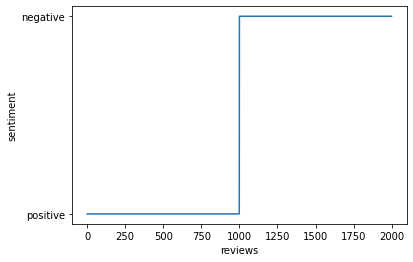

In [ ]:
plt.plot(y_data.index, data['sentiment'])
plt.xlabel('reviews')
plt.ylabel('sentiment')
plt.show()

<hr>

### Split Dataset
In this work, We decided to split the data into 80% of Training and 20% of Testing set using <b>train_test_split</b> method from Scikit-Learn. By using this method, it automatically shuffles the dataset. We need to shuffle the data because in the original dataset, the reviews and sentiments are in order, where they list positive reviews first and then negative reviews (we don't want our model to learn it). By shuffling the data, it will be distributed equally in the model, so it will be more accurate for predictions.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1)

<hr>  

Now we have a **train** and a **test** set.

In [ ]:
print('Train Set')
print(x_train, '\n')
print(x_test, '\n')
print('Test Set')
print(y_train, '\n')
print(y_test)

print('\nshapes:')
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Train Set
[[  151 22076  1502 ...     0     0     0]
 [   16  1038   234 ...  1410   216   638]
 [  351  2040   694 ...   968   567   301]
 ...
 [ 3337   524   486 ...  3809  3712   304]
 [  945  1049  1182 ...     0     0     0]
 [ 2914   905   924 ...     0     0     0]] 

[[  521   720  7896 ...  1249    22  1249]
 [   96   775  1129 ...    26   461  4790]
 [  137  5140    16 ...     0     0     0]
 ...
 [ 1077  1303 19579 ...   313   386  8777]
 [  224   684  1225 ...   726  4869     1]
 [ 4641   795   145 ...     0     0     0]] 

Test Set
650     1
1104    0
561     1
643     1
441     1
       ..
1791    0
1096    0
1932    0
235     1
1061    0
Name: sentiment, Length: 1500, dtype: int64 

674     1
1699    0
1282    0
1315    0
1210    0
       ..
537     1
1450    0
1919    0
255     1
589     1
Name: sentiment, Length: 500, dtype: int64

shapes:
(1500, 353)
(500, 353)
(1500,)
(500,)


We visualise the distribution of the sentiments in the train set.

We observe that the reviews and sentiments are shuffled.

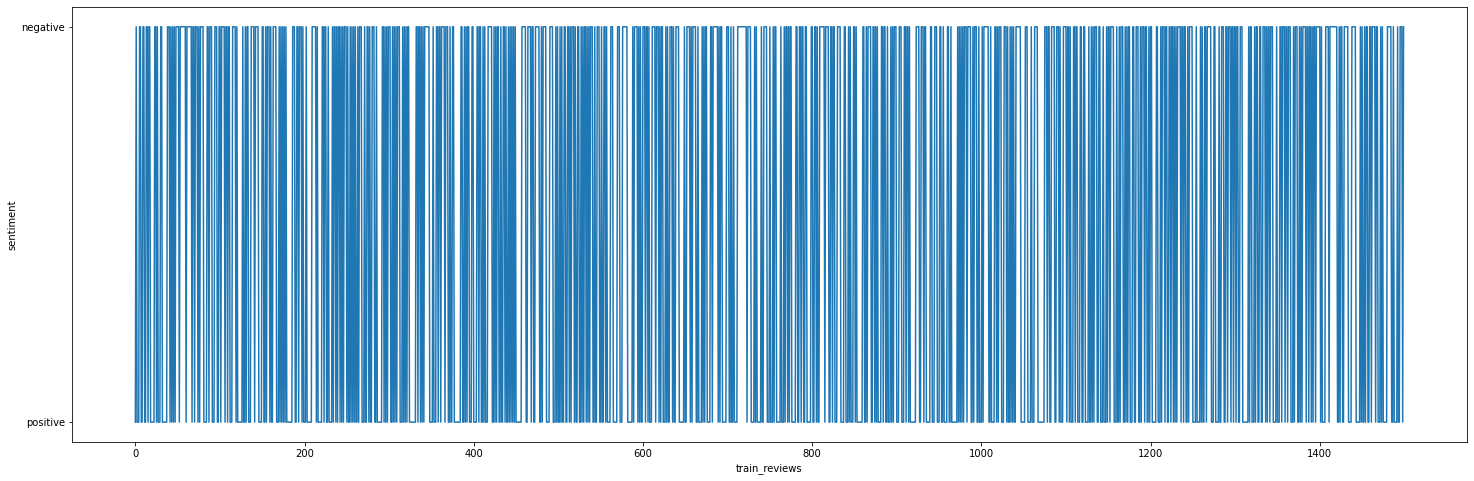

In [ ]:
train = pd.Series(y_train.values)
xaxis = train.index
yaxis = y_train
yaxis = yaxis.replace(0, 'negative')
yaxis = yaxis.replace(1, 'positive')
plt.figure(figsize=(25,8))
plt.plot(xaxis, yaxis)
plt.xlabel('train_reviews')
plt.ylabel('sentiment')
plt.show()

<hr>

We visualise the distribution of the sentiments in the test set.

We observe that the reviews and sentiments are shuffled. 

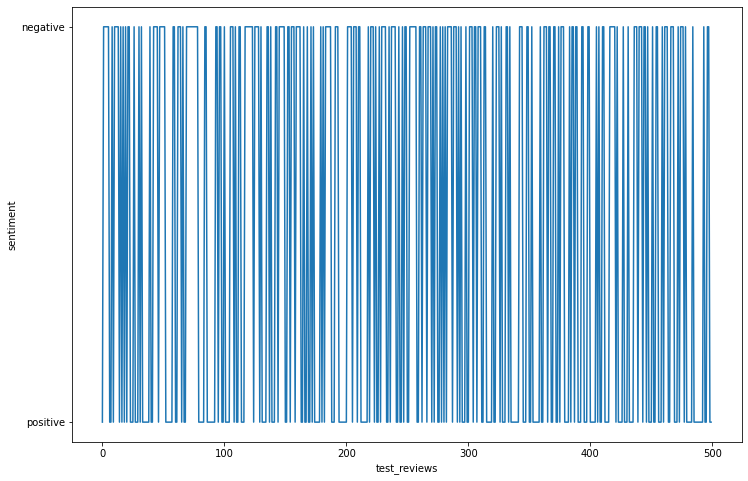

In [ ]:
test = pd.Series(y_test.values)
xaxis = test.index
yaxis = y_test
yaxis = yaxis.replace(0, 'negative')
yaxis = yaxis.replace(1, 'positive')
plt.figure(figsize=(12,8))
plt.plot(xaxis, yaxis)
plt.xlabel('test_reviews')
plt.ylabel('sentiment')
plt.show()

### Preparing the text Data

Our computer can't do classification based on our raw data. It needs to be able to understand it and so we need to vectorize it.

In machine words "just turn the text data into vectors, I can't unserstand your beep language"

There are few methods to transform the text data into vectors: 

1. Bag of Words Model

Find every uniques words from the list of documents. Then parse each document with the words of the vocabulary. If the word is present "1" else "0".

This makes each document vector maintain the same length that of the vocabulary length.

In [ ]:
#Example
documents = ["Super nice movie", "How to loose two ours of your life"]

words = list(set([word for document in documents for word in document.lower().split()]))
vectors = []

for document in documents:
  vectors.append([
      1 if word in document.lower().split()
      else
      0 for word in words # we ignore non previous seen words
  ])
print('vocabulary: ', words)
print('vectors: ', vectors)

vocabulary:  ['two', 'how', 'life', 'to', 'super', 'loose', 'nice', 'movie', 'ours', 'your', 'of']
vectors:  [[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0], [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]]


2. Words Counts with CountVectorizer(scikit-learn)
As previous we will tokenize the documents and form a vocabulary with it. Then
we will use the vocabulary to encode new documents but we remember the number of occurence of each word.

By default it remove the punctuation and lower the documents.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#same list of documents
#Example
documents = ["Super nice movie nice", "How to loose two ours of your life two"]

#create the transformer
count_vectorizer = CountVectorizer()

#tokenize and build vocabulary
count_vectorizer.fit(documents)
print('vocabulary: ', count_vectorizer.vocabulary_)

#encode the document
vectors = count_vectorizer.transform(documents)

#summarize of the encoded vector
print('shape: ', vectors.shape)
print('vectors', vectors.toarray())

vocabulary:  {'super': 7, 'nice': 4, 'movie': 3, 'how': 0, 'to': 8, 'loose': 2, 'two': 9, 'ours': 6, 'of': 5, 'your': 10, 'life': 1}
shape:  (2, 11)
vectors [[0 0 0 1 2 0 0 1 0 0 0]
 [1 1 1 0 0 1 1 0 1 2 1]]


It turns each vector into the sparse matrix. It will make sure the word present in the vocabulary and if present it prints the number of occurrences of the word in the vocabulary. The word "nice" present twice in the first document so '2' appeared in the first vector.

3. Word Frequencies with TfidfVectorizer (scikit-learn)

Word counts are pretty basic. It'll prioritize words that has no meaning, for example stop-words can repeat several times in a document. From word counts, we lose the interesting words and we mostly give priority to stopping words/less meaning carrying words.

TF-IDF is a popular methods : "Term Frequency and Inverse document Frequency"
It's words frequency scores that try to highlight words that are more interesting, e.g frequent in a document but not across documents.

There are few types of weighting schemes for tf-idf in general. We'll use the one that scikit-learn has implemented

From scikit-learn "The actual formula used for tf-idf is":

**tf * (idf + 1) = tf + tf * idf**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#same list of documents
#Example
documents = ["Super nice movie nice", "How to loose two nice hours of your life two"]

# create the transform
tf_idf_vectorizer = TfidfVectorizer()
# tokenize and build vocab
tf_idf_vectorizer.fit(documents)
# summarize
print('vocabulary: ', tf_idf_vectorizer.vocabulary_)
print('idfs: ', tf_idf_vectorizer.idf_)# encode document
vector = tf_idf_vectorizer.transform([documents[0]])
# summarize encoded vector
print('vectors: ', vector.toarray())

vocabulary:  {'super': 7, 'nice': 5, 'movie': 4, 'how': 1, 'to': 8, 'loose': 3, 'two': 9, 'hours': 0, 'of': 6, 'your': 10, 'life': 2}
idfs:  [1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511]
vectors:  [[0.         0.         0.         0.         0.49844628 0.70929727
  0.         0.49844628 0.         0.         0.        ]]


IDF per term is calculated by : 
```idf(words) = log((1 + nb of documents) / (1 + nb of documents where the words is)) + 1```

Example : 

let's take the word nice", it's present in both documents, so
```log((1+2) / (1+2)) + 1 == log(3/3) + 1 == 1```

let's take another word "loose" that is present only in one document, so
```log((1+2) / (1+1)) + 1 == log(3/2) + 1 == 1.4056511```

The final step is vector normalization, scikit-learn uses 'l2' normalization technique for each document.

Tf-idf is the best vectorization method among these three because it prioritises the words in each document. So, unlike word counts which give a higher value for stop words like “in”, “this”, word frequency lowers the value if it present in more number of documents, because stop words repeat in each document almost.

### Vectorize sentences used for _training_ & _testing_

We implemented our model and tested them with both vectorized representation to see if the tfidf is really better or not.

In [ ]:
# learn training data vocabulary, then use it to create a document-term matrix
count_vectorizer.fit(x_train)

x_train_count_dtm = count_vectorizer.transform(x_train)
x_test_count_dtm = count_vectorizer.transform(x_test)

In [ ]:
# learn training data vocabulary, then use it to create a document-term matrix
tf_idf_vectorizer = TfidfVectorizer(min_df = 5, max_df = 0.8, sublinear_tf = True, use_idf = True) #optimized hyperparameters found

tf_idf_vectorizer.fit(x_train)

x_train_tfidf_dtm = tf_idf_vectorizer.transform(x_train)
x_test_tfidf_dtm = tf_idf_vectorizer.transform(x_test)

## Graph Analysis


Visualization of the 30 most frequent words. 

We observe that the biggest amount of those do not have a sentimental meaning (24 neutral words, 6 sentimental words).

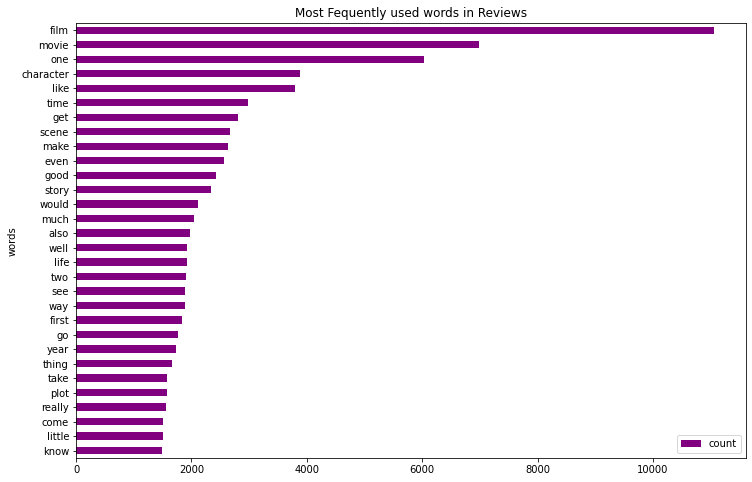

In [ ]:
tokens = list(lemmatized_tokens)
token_list = list(itertools.chain(*tokens))
counts_no = Counter(token_list)
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words','count'])
fig, ax = plt.subplots(figsize=(12,8))
clean_reviews.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="purple")
ax.set_title("Most Fequently used words in Reviews")
plt.show()

Visualization of the 30 most frequent words in positive reviews.

We observe that the biggest amount of those do not have a sentimental meaning (24 neutral words, 6 sentimental words).

We also observe that the word 'best' for example, which has a positive meaning, appears frequently only in positive reviews, as expected.

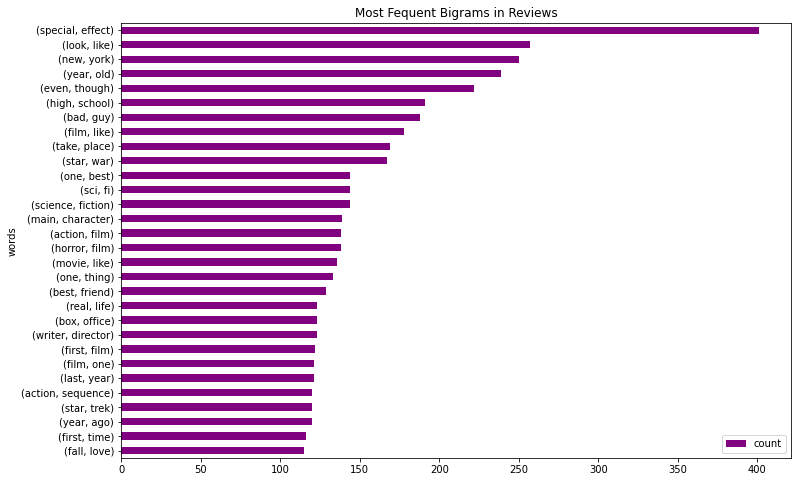

In [ ]:
bigrams = zip(token_list,token_list[1:])
counts_no = Counter(bigrams)
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words','count'])
fig, ax = plt.subplots(figsize=(12,8))
clean_reviews.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="purple")
ax.set_title("Most Fequent Bigrams in Reviews")
plt.show()

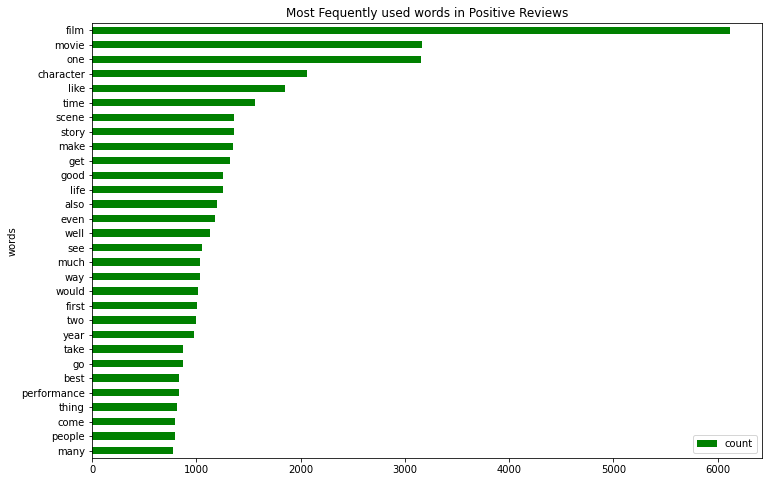

In [ ]:
tokens = list(lemmatized_tokens.loc[data['sentiment'] == "positive"])
token_list = list(itertools.chain(*tokens))
counts_no = Counter(token_list)
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words','count'])
fig, ax = plt.subplots(figsize=(12,8))
clean_reviews.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="green")
ax.set_title("Most Fequently used words in Positive Reviews")
plt.show()

Visualization of the 30 most frequent words in negative reviews.

We observe that the biggest amount of those do not have a sentimental meaning (22 neutral words, 8 sentimental words).

We also observe that the word 'good' for example, which has a positive meaning, appears almost 1000 times in negative reviews, some times less that in positive reviews. 

Also, the word 'little', which has a negative meaning, appears only in negative reviews, as expected.

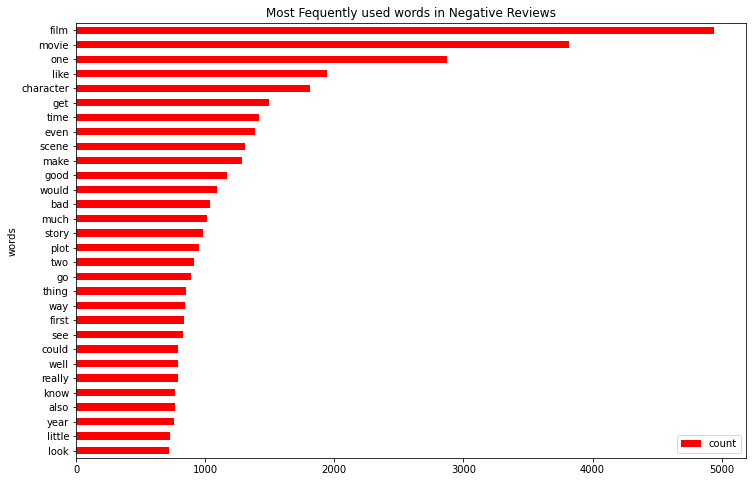

In [ ]:
tokens = list(lemmatized_tokens.loc[data['sentiment'] == "negative"])
token_list = list(itertools.chain(*tokens))
counts_no = Counter(token_list)
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words','count'])
fig, ax = plt.subplots(figsize=(12,8))
clean_reviews.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="red")
ax.set_title("Most Fequently used words in Negative Reviews")
plt.show()

Visualization of the most sentimental words in reviews. (It doesn't create a scetter text plot as expected)

In [ ]:
'''
corpus = data.loc[(data['sentiment'] == "positive") | (data['sentiment'] == "negative")]
print(corpus.loc[0])
print("Document Count")
print(corpus.groupby('review')['sentiment'].count())
print("Word Count")
corpus.groupby('review').apply(lambda x: x.apply(lambda x: len(x.split())).sum())
corpus['parsed'] = corpus.text.apply(nlp)
corpus = st.CorpusFromParsedDocuments(corpus.loc[0], category_col='sentiment', parsed_col='parsed').build()
html = st.produce_scattertext_explorer(corpus,category="Positive", category_name='Negative', not_category_name='Positive', minimum_term_frequency=5, width_in_pixels=1000, transform=st.Scalers.log_scale_standardize)
file_name = 'Sentimental Words Visualization.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width=1000, heigth=700)
'''


'\ncorpus = data.loc[(data[\'sentiment\'] == "positive") | (data[\'sentiment\'] == "negative")]\nprint(corpus.loc[0])\nprint("Document Count")\nprint(corpus.groupby(\'review\')[\'sentiment\'].count())\nprint("Word Count")\ncorpus.groupby(\'review\').apply(lambda x: x.apply(lambda x: len(x.split())).sum())\ncorpus[\'parsed\'] = corpus.text.apply(nlp)\ncorpus = st.CorpusFromParsedDocuments(corpus.loc[0], category_col=\'sentiment\', parsed_col=\'parsed\').build()\nhtml = st.produce_scattertext_explorer(corpus,category="Positive", category_name=\'Negative\', not_category_name=\'Positive\', minimum_term_frequency=5, width_in_pixels=1000, transform=st.Scalers.log_scale_standardize)\nfile_name = \'Sentimental Words Visualization.html\'\nopen(file_name, \'wb\').write(html.encode(\'utf-8\'))\nIFrame(src=file_name, width=1000, heigth=700)\n'

Method Statistics Visualization:

In [ ]:
from sklearn import metrics

def Metrics_Viz(y_test, y_pred_class, start, stop, step, label):
    report = classification_report(y_test, y_pred_class, output_dict=True, labels=[0,1])
    print("\nMetrics: ")
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print(type(accuracy))
    
    print('accuracy: ' + str(accuracy))
    
    print('positive: ', report['0'])
    print('negative: ', report['1'])
    
    print("\n")

    N = 2
    ind = np.arange(N) 
    width = 0.25
    fig, ax = plt.subplots(figsize=(8,6))
    ax.margins(x=0, y=-0.1)

    xvals = [report['0']['precision']*100, report['1']['precision']*100]
    bar1 = ax.bar(ind, xvals, width, color = 'r')
 
    yvals = [report['0']['recall']*100, report['1']['recall']*100]
    bar2 = ax.bar(ind+width, yvals, width, color='g')
  
    zvals = [report['0']['f1-score']*100, report['1']['f1-score']*100]
    bar3 = ax.bar(ind+width*2, zvals, width, color = 'b')
  
    plt.xlabel("Sentiment", size=16)
    plt.ylabel('Percentage %', size=16)
    plt.title(label, size=20)
  
    plt.ylim(start, stop)
    plt.yticks(np.arange(start, stop, step), size=12)
    plt.xticks(ind+width,["Positive\n(Support={})".format(report['0']['support']), "Negative\n(Support={})".format(report['1']['support'])], size=14)
    plt.legend( (bar1, bar2, bar3), ('Precision', 'Recall', 'F1-Score'))
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='12')
    plt.show()
    return report, accuracy


Confusion Matrix Visualization:

In [ ]:
from sklearn import metrics

def Confusion_Matrix_Viz(label):
    print('\nConfusion Matrix:')
    print(metrics.confusion_matrix(y_test, y_pred_class))
    print("\n")

    import seaborn as sns
    sns.set(style='white')
    cm = metrics.confusion_matrix(y_test, y_pred_class)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=cm, fmt='g', annot_kws={'size': 30},
            cmap=sns.color_palette(['tomato', 'palegreen'], as_cmap=True), cbar=False,
            yticklabels=['True', 'False'], xticklabels=['True', 'False'], ax=ax)
    ax.tick_params(labelsize=16, length=0)

    ax.set_title(label, size=16, pad=20)
    ax.set_xlabel('Predicted Values', size=16)
    ax.set_ylabel('Actual Values', size=16)

    additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
    for text_elt, additional_text in zip(ax.texts, additional_texts):
        ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(),
            ha='center', va='top', size=20)
    plt.tight_layout()
    plt.show()
    return cm

#Stastisticals Models for sentiement classification

## Multinomial Naive Bayes

We will use [multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html):

> The multinomial Naive Bayes classifier is suitable for classification with **discrete features** (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

TODO: Try to make the model better with some methods from this link. 
https://www.baeldung.com/cs/naive-bayes-classification-performance

#### Multinomial Naive Bayes Without Smoothing:

In [ ]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0)

##### Count Vectorizer

Count Vectorizer:
CPU times: user 10 ms, sys: 1.09 ms, total: 11.1 ms
Wall time: 9.68 ms

Metrics: 
<class 'numpy.float64'>
accuracy: 0.72
positive:  {'precision': 0.7419354838709677, 'recall': 0.6571428571428571, 'f1-score': 0.6969696969696969, 'support': 245}
negative:  {'precision': 0.7031802120141343, 'recall': 0.7803921568627451, 'f1-score': 0.7397769516728624, 'support': 255}




/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


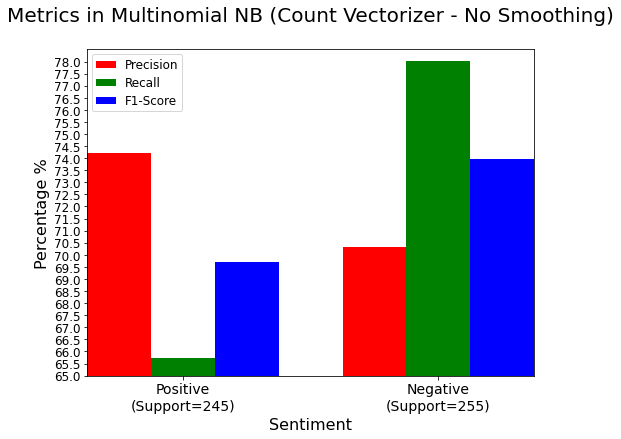


Confusion Matrix:
[[161  84]
 [ 56 199]]




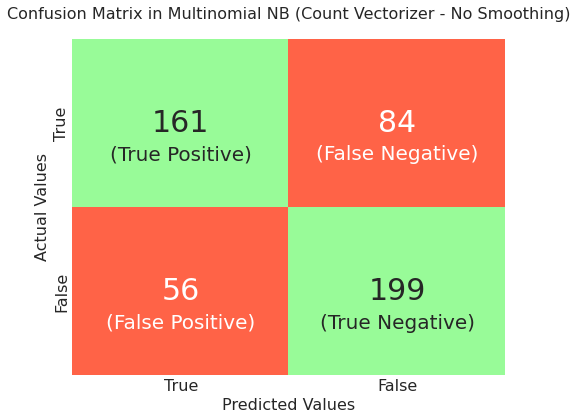

In [ ]:
from sklearn.metrics import classification_report

#Count Vectorizer
print('Count Vectorizer:')
# train the model using X_train_count_dtm & prediction
%time nb.fit(x_train_count_dtm, y_train)
y_pred_class = nb.predict(x_test_count_dtm)

# compute accuracy of class predictions and show method metrics
report, accuracy = Metrics_Viz(y_test, y_pred_class, 65, 78.5, 0.5, "Metrics in Multinomial NB (Count Vectorizer - No Smoothing)\n")

# compute and show confusion matrix
cm = Confusion_Matrix_Viz("Confusion Matrix in Multinomial NB (Count Vectorizer - No Smoothing)")

##### Tf-Idf


Tf_idf:
CPU times: user 8.33 ms, sys: 2.08 ms, total: 10.4 ms
Wall time: 11.3 ms

Metrics: 
<class 'numpy.float64'>
accuracy: 0.752
positive:  {'precision': 0.7737556561085973, 'recall': 0.6979591836734694, 'f1-score': 0.7339055793991416, 'support': 245}
negative:  {'precision': 0.7347670250896058, 'recall': 0.803921568627451, 'f1-score': 0.7677902621722846, 'support': 255}




/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


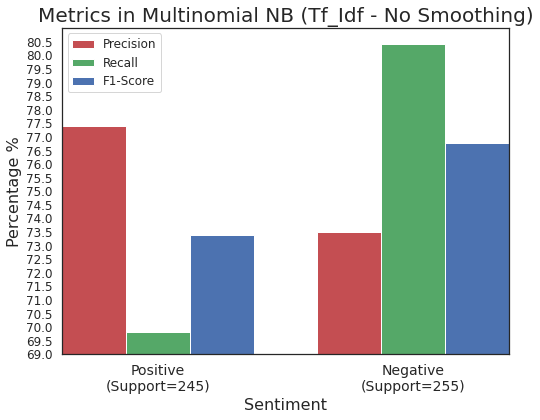


Confusion Matrix:
[[171  74]
 [ 50 205]]




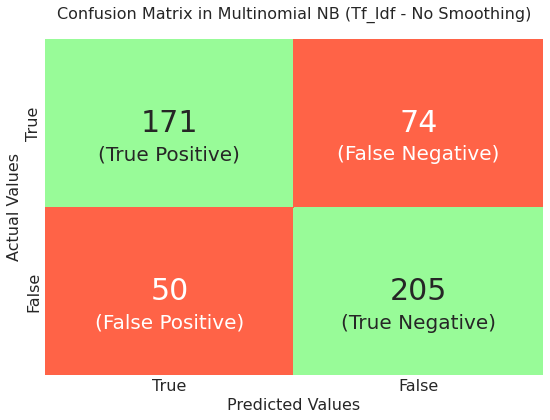

In [ ]:
# Tf_idf
print('\nTf_idf:')
# train the model using X_train_tfidf_dtm & prediction
%time nb.fit(x_train_tfidf_dtm, y_train)
y_pred_class = nb.predict(x_test_tfidf_dtm)

# compute accuracy of class predictions and show method metrics
report, accuracy = Metrics_Viz(y_test, y_pred_class, 69, 81, 0.5, 'Metrics in Multinomial NB (Tf_Idf - No Smoothing)')

# compute and show confusion matrix
cm = Confusion_Matrix_Viz("Confusion Matrix in Multinomial NB (Tf_Idf - No Smoothing)")

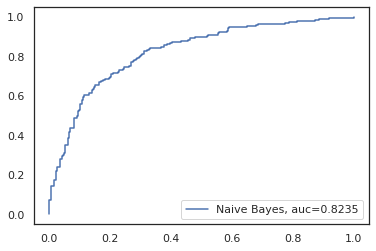

In [ ]:
# calculate AUC
y_pred_prob = nb.predict_proba(x_test_tfidf_dtm)[:, 1]
auc = metrics.roc_auc_score(y_test, y_pred_prob)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label=f"Naive Bayes, auc={auc:.5}")
plt.legend(loc=4)
plt.show()

#### Multinomial Naive Bayes With Laplacian Smoothing:

In [ ]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=1)

##### Count Vectorizer

Count Vectorizer:
CPU times: user 4.71 ms, sys: 44 µs, total: 4.75 ms
Wall time: 4.78 ms

Metrics: 
<class 'numpy.float64'>
accuracy: 0.832
positive:  {'precision': 0.8108108108108109, 'recall': 0.8571428571428571, 'f1-score': 0.8333333333333334, 'support': 245}
negative:  {'precision': 0.8547717842323651, 'recall': 0.807843137254902, 'f1-score': 0.8306451612903226, 'support': 255}




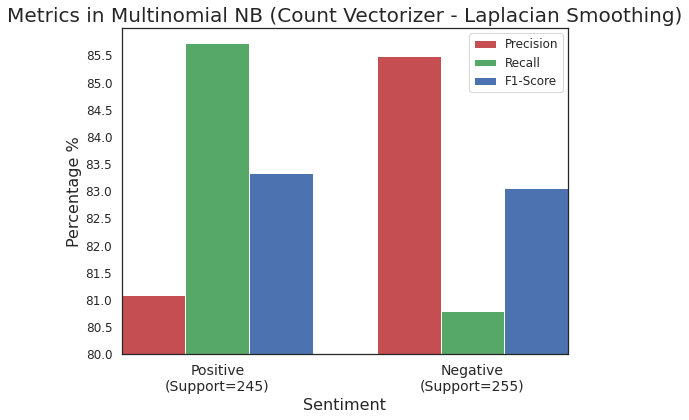


Confusion Matrix:
[[210  35]
 [ 49 206]]




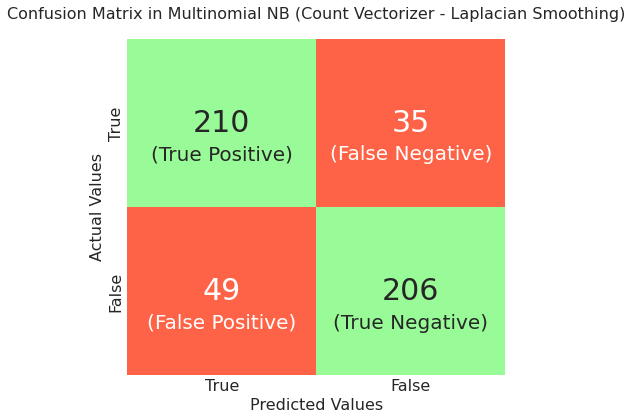

In [ ]:
from sklearn.metrics import classification_report

#Count Vectorizer
print('Count Vectorizer:')
# train the model using X_train_count_dtm & prediction
%time nb.fit(x_train_count_dtm, y_train)
y_pred_class = nb.predict(x_test_count_dtm)

# compute accuracy of class predictions and show method metrics
report, accuracy = Metrics_Viz(y_test, y_pred_class, 80, 86, 0.5, "Metrics in Multinomial NB (Count Vectorizer - Laplacian Smoothing)")

# compute and show confusion matrix
cm = Confusion_Matrix_Viz("Confusion Matrix in Multinomial NB (Count Vectorizer - Laplacian Smoothing)")

##### Tf-Idf


Tf_idf:
CPU times: user 6.25 ms, sys: 873 µs, total: 7.12 ms
Wall time: 6.87 ms
1699    star wars episode phantom menace director geor...
1813    sean connery stars harvard law professor heads...
1482    seen trailers commercials rather difficult rea...
367     plot good ol texan kid suddenly gets play firs...
730     let first say conditions forced watch matrix l...
                              ...                        
804     note ordinarily moviereviews org give away cri...
1629    difficult expect much director whose greatest ...
1653    walken stars mobster kidnapped held ransom fou...
446     rainy friday afternoon columbus persuaded frie...
589     harmless silly fun comedy dim witted wrestling...
Name: review, Length: 80, dtype: object

Metrics: 
<class 'numpy.float64'>
accuracy: 0.84
positive:  {'precision': 0.8160919540229885, 'recall': 0.8693877551020408, 'f1-score': 0.841897233201581, 'support': 245}
negative:  {'precision': 0.8661087866108786, 'recall': 0.811764705882

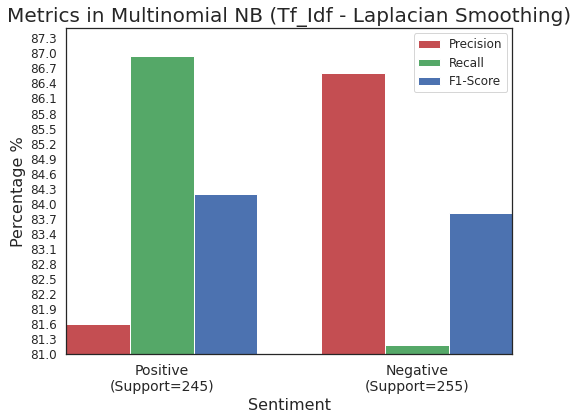


Confusion Matrix:
[[213  32]
 [ 48 207]]




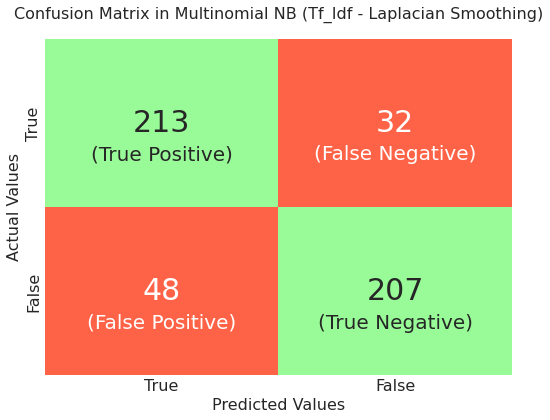

In [ ]:
# Tf_idf
print('\nTf_idf:')
# train the model using X_train_tfidf_dtm & prediction
%time nb.fit(x_train_tfidf_dtm, y_train)
y_pred_class = nb.predict(x_test_tfidf_dtm)
diff = y_test - y_pred_class
diff = diff[diff!=0]
false_reviews = x_data.iloc[diff.index]
print(false_reviews)

# compute accuracy of class predictions and show method metrics
nb_report, nb_accuracy = Metrics_Viz(y_test, y_pred_class, 81, 87.5, 0.3, "Metrics in Multinomial NB (Tf_Idf - Laplacian Smoothing)")

# compute and show confusion matrix
nb_cm = Confusion_Matrix_Viz("Confusion Matrix in Multinomial NB (Tf_Idf - Laplacian Smoothing)")

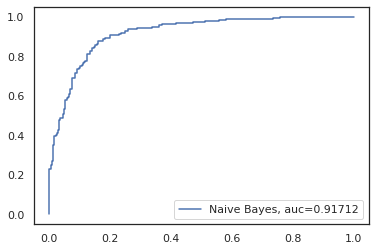

In [ ]:
# calculate AUC
y_pred_prob = nb.predict_proba(x_test_tfidf_dtm)[:, 1]
auc = metrics.roc_auc_score(y_test, y_pred_prob)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label=f"Naive Bayes, auc={auc:.5}")
plt.legend(loc=4)
plt.show()

## Logistic Regression

We will use [logistic regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression):

> Logistic regression, despite its name, is a **linear model for classification** rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

#### Linear Logistic Regression with l2 penalty

In [ ]:
# import and instantiate a logistic regression model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', penalty = 'l2')

##### Count Vectorizer:

Count Vectorizer:
CPU times: user 689 ms, sys: 604 ms, total: 1.29 s
Wall time: 710 ms

Metrics: 
<class 'numpy.float64'>
accuracy: 0.852
positive:  {'precision': 0.8461538461538461, 'recall': 0.8530612244897959, 'f1-score': 0.8495934959349594, 'support': 245}
negative:  {'precision': 0.857707509881423, 'recall': 0.8509803921568627, 'f1-score': 0.8543307086614174, 'support': 255}




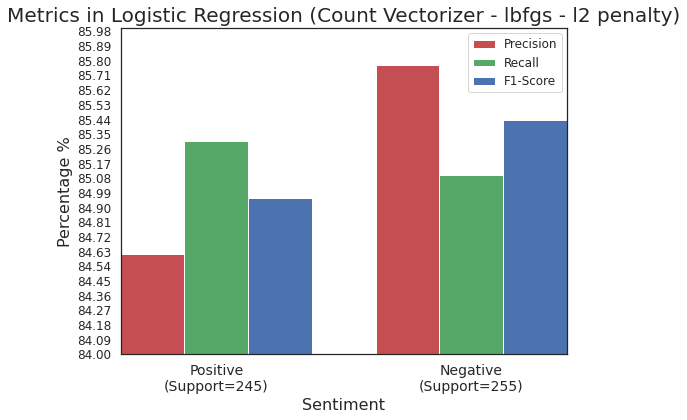


Confusion Matrix:
[[209  36]
 [ 38 217]]




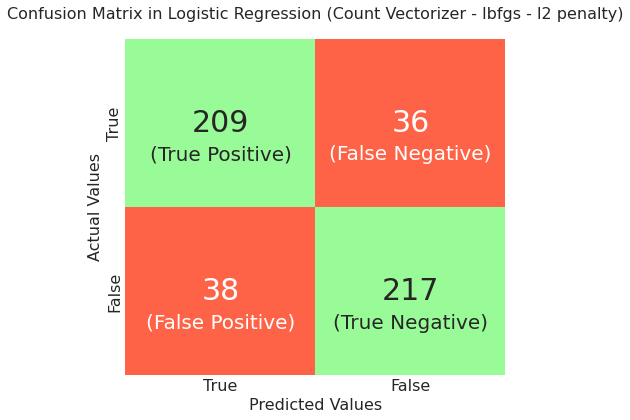

In [ ]:
#Count Vectorizer
print('Count Vectorizer:')
# train the model using X_train_count_dtm & prediction
%time logreg.fit(x_train_count_dtm, y_train)
y_pred_class = logreg.predict(x_test_count_dtm)

# compute accuracy of class predictions and show method metrics
report, accuracy = Metrics_Viz(y_test, y_pred_class, 84, 86, 0.09, 'Metrics in Logistic Regression (Count Vectorizer - lbfgs - l2 penalty)')

# compute and show confusion matrix
cm = Confusion_Matrix_Viz('Confusion Matrix in Logistic Regression (Count Vectorizer - lbfgs - l2 penalty)')

##### Tf_idf:


Tf_idf:
CPU times: user 83.9 ms, sys: 72.3 ms, total: 156 ms
Wall time: 87.1 ms

Metrics: 
<class 'numpy.float64'>
accuracy: 0.864
positive:  {'precision': 0.852589641434263, 'recall': 0.8734693877551021, 'f1-score': 0.8629032258064516, 'support': 245}
negative:  {'precision': 0.8755020080321285, 'recall': 0.8549019607843137, 'f1-score': 0.8650793650793651, 'support': 255}




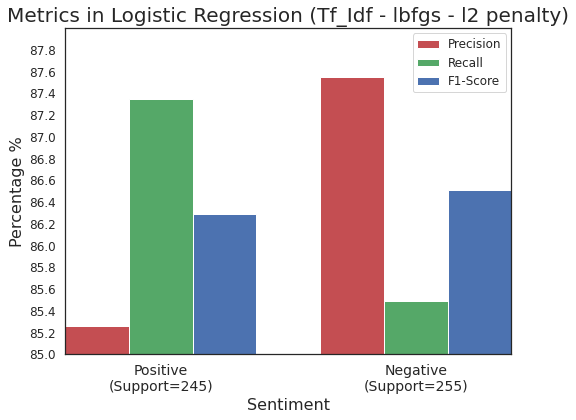


Confusion Matrix:
[[214  31]
 [ 37 218]]




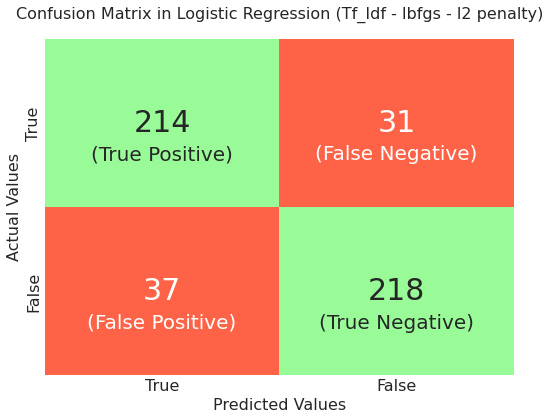

In [ ]:
# Tf_idf
print('\nTf_idf:')
# train the model using X_train_tfidf_dtm & prediction
%time logreg.fit(x_train_tfidf_dtm, y_train)
y_pred_class = logreg.predict(x_test_tfidf_dtm)

# compute accuracy of class predictions and show method metrics
lg_report, lg_accuracy = Metrics_Viz(y_test, y_pred_class, 85, 88, 0.2, 'Metrics in Logistic Regression (Tf_Idf - lbfgs - l2 penalty)')

# compute and show confusion matrix
lg_cm = Confusion_Matrix_Viz('Confusion Matrix in Logistic Regression (Tf_Idf - lbfgs - l2 penalty)')

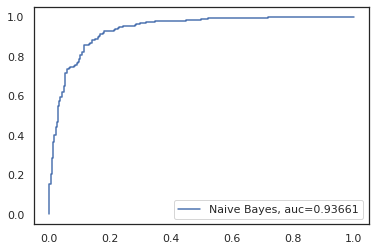

In [ ]:
# calculate AUC
y_pred_prob = logreg.predict_proba(x_test_tfidf_dtm)[:, 1]
auc = metrics.roc_auc_score(y_test, y_pred_prob)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label=f"Naive Bayes, auc={auc:.5}")
plt.legend(loc=4)
plt.show()

#### Linear Logistic Regression without l2 penalty

In [ ]:
# import and instantiate a logistic regression model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', penalty='none')

##### Count Vectorizer

Count Vectorizer:
CPU times: user 257 ms, sys: 186 ms, total: 443 ms
Wall time: 243 ms

Metrics: 
<class 'numpy.float64'>
accuracy: 0.862
positive:  {'precision': 0.860655737704918, 'recall': 0.8571428571428571, 'f1-score': 0.8588957055214723, 'support': 245}
negative:  {'precision': 0.86328125, 'recall': 0.8666666666666667, 'f1-score': 0.8649706457925636, 'support': 255}




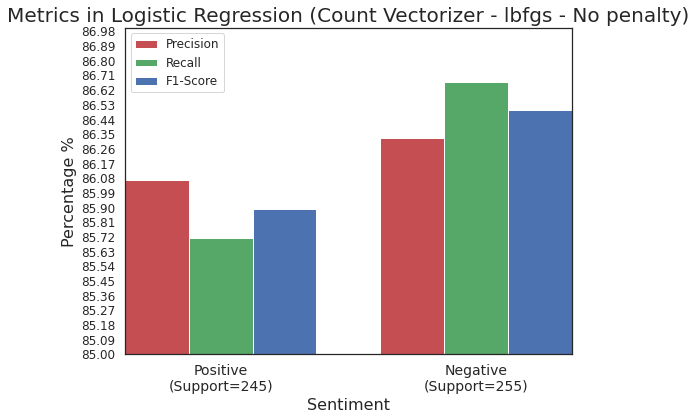


Confusion Matrix:
[[210  35]
 [ 34 221]]




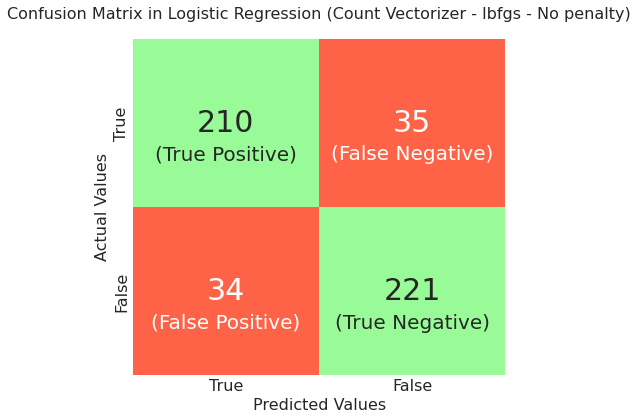

In [ ]:
#Count Vectorizer
print('Count Vectorizer:')
# train the model using X_train_count_dtm & prediction
%time logreg.fit(x_train_count_dtm, y_train)
y_pred_class = logreg.predict(x_test_count_dtm)

# compute accuracy of class predictions and show method metrics
report, accuracy = Metrics_Viz(y_test, y_pred_class, 85, 87, 0.09, 'Metrics in Logistic Regression (Count Vectorizer - lbfgs - No penalty)')

# compute and show confusion matrix
cm = Confusion_Matrix_Viz('Confusion Matrix in Logistic Regression (Count Vectorizer - lbfgs - No penalty)')

##### Tf-Idf


Tf_idf:
CPU times: user 94.5 ms, sys: 80.2 ms, total: 175 ms
Wall time: 95 ms

Metrics: 
<class 'numpy.float64'>
accuracy: 0.884
positive:  {'precision': 0.8879668049792531, 'recall': 0.8734693877551021, 'f1-score': 0.8806584362139918, 'support': 245}
negative:  {'precision': 0.8803088803088803, 'recall': 0.8941176470588236, 'f1-score': 0.88715953307393, 'support': 255}




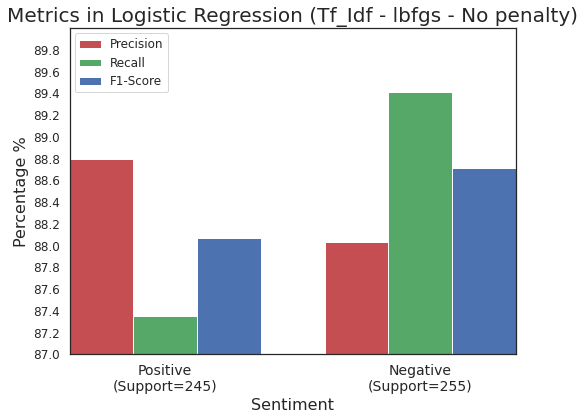


Confusion Matrix:
[[214  31]
 [ 27 228]]




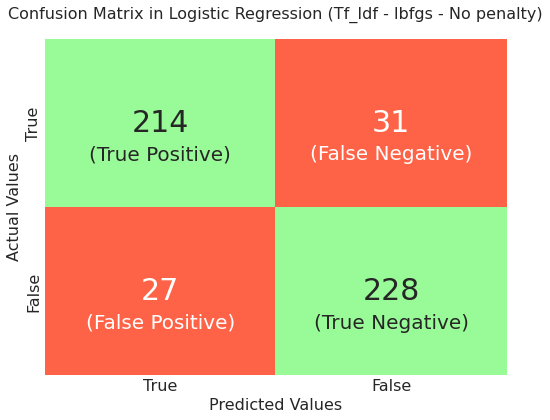

In [ ]:
# Tf_idf
print('\nTf_idf:')
# train the model using X_train_tfidf_dtm & prediction
%time logreg.fit(x_train_tfidf_dtm, y_train)
y_pred_class = logreg.predict(x_test_tfidf_dtm)

# compute accuracy of class predictions and show method metrics
lg_report, lg_accuracy = Metrics_Viz(y_test, y_pred_class, 87, 90, 0.2, 'Metrics in Logistic Regression (Tf_Idf - lbfgs - No penalty)')

# compute and show confusion matrix
lg_cm = Confusion_Matrix_Viz('Confusion Matrix in Logistic Regression (Tf_Idf - lbfgs - No penalty)')

## Support Vectors Machines

we will use [support vector machines](https://scikit-learn.org/stable/modules/svm.html)

> SVM is a supervised(feed-me) machine learning algorithm that can be used for both classification or regression challenges. SVM performs classification by finding the hyper-plane that differentiate the classes we plotted in n-dimensional space.

#### Polynomial kernel SVM

##### Count Vectorizer

Count Vectorizer:
CPU times: user 5.46 s, sys: 2.02 ms, total: 5.46 s
Wall time: 5.56 s

Metrics: 
<class 'numpy.float64'>
accuracy: 0.584
positive:  {'precision': 0.542528735632184, 'recall': 0.963265306122449, 'f1-score': 0.6941176470588235, 'support': 245}
negative:  {'precision': 0.8615384615384616, 'recall': 0.2196078431372549, 'f1-score': 0.35, 'support': 255}




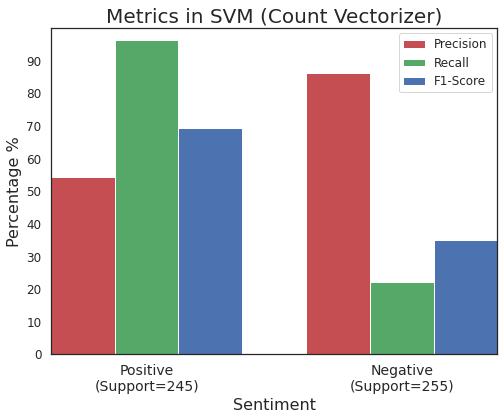


Confusion Matrix:
[[236   9]
 [199  56]]




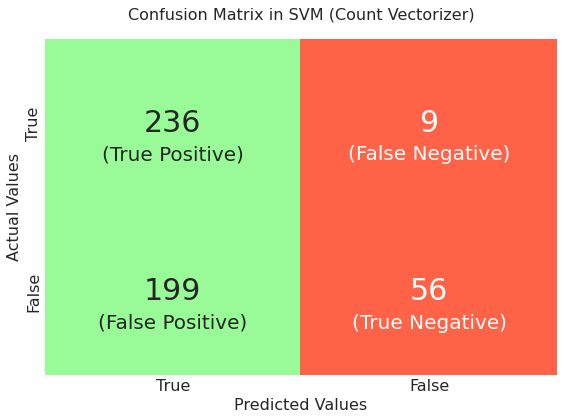

In [ ]:
from sklearn import svm

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='poly')

#Count Vectorizer
print('Count Vectorizer:')
# train the model using X_train_count_dtm & prediction
%time classifier_linear.fit(x_train_count_dtm, y_train)
y_pred_class = classifier_linear.predict(x_test_count_dtm)

# compute accuracy of class predictions and show method metrics
report, accuracy = Metrics_Viz(y_test, y_pred_class, 0, 100, 10, 'Metrics in SVM (Count Vectorizer)')

# compute and show confusion matrix
cm = Confusion_Matrix_Viz('Confusion Matrix in SVM (Count Vectorizer)')

##### Tf_Idf


Tf_idf:
CPU times: user 6.03 s, sys: 15.5 ms, total: 6.05 s
Wall time: 7.65 s

Metrics: 
<class 'numpy.float64'>
accuracy: 0.804
positive:  {'precision': 0.7508532423208191, 'recall': 0.8979591836734694, 'f1-score': 0.8178438661710037, 'support': 245}
negative:  {'precision': 0.8792270531400966, 'recall': 0.7137254901960784, 'f1-score': 0.7878787878787878, 'support': 255}




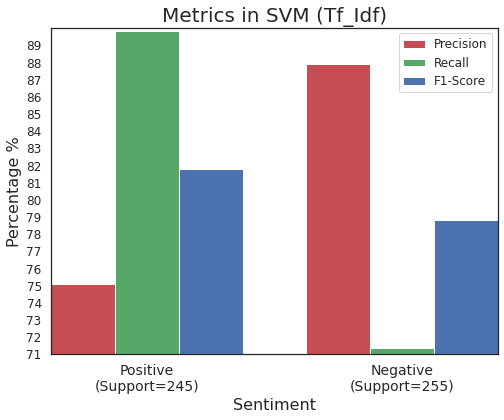


Confusion Matrix:
[[220  25]
 [ 73 182]]




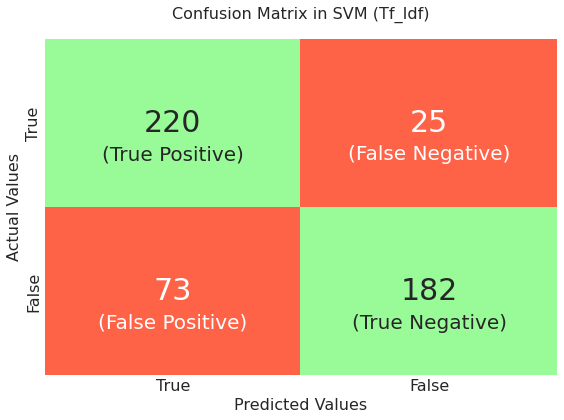

In [ ]:
# Tf_idf
print('\nTf_idf:')
# train the model using X_train_tfidf_dtm & prediction
%time classifier_linear.fit(x_train_tfidf_dtm, y_train)
y_pred_class = classifier_linear.predict(x_test_tfidf_dtm)

# compute accuracy of class predictions and show method metrics
svm_report, svm_accuracy = Metrics_Viz(y_test, y_pred_class, 71, 90, 1, 'Metrics in SVM (Tf_Idf)')

# compute and show confusion matrix
svm_cm = Confusion_Matrix_Viz('Confusion Matrix in SVM (Tf_Idf)')

#### Linear kernel SVM

The tuning parameter Kernel — “RBF” is for non-linear problems and it is also a general-purpose kernel used when there is no prior knowledge about the data. Kernel —” linear” is for linear separable problems. Since our problem is linear(just positive and negative) here, we will go for “linear SVM”.

##### Count Vectorizer:

Count Vectorizer:
CPU times: user 5.79 s, sys: 22.7 ms, total: 5.82 s
Wall time: 7.74 s

Metrics: 
<class 'numpy.float64'>
accuracy: 0.832
positive:  {'precision': 0.8285714285714286, 'recall': 0.8285714285714286, 'f1-score': 0.8285714285714286, 'support': 245}
negative:  {'precision': 0.8352941176470589, 'recall': 0.8352941176470589, 'f1-score': 0.8352941176470589, 'support': 255}




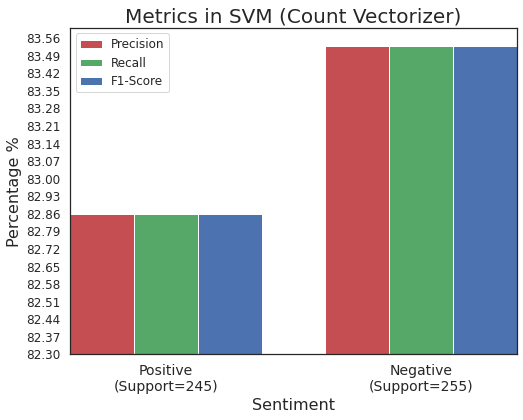


Confusion Matrix:
[[203  42]
 [ 42 213]]




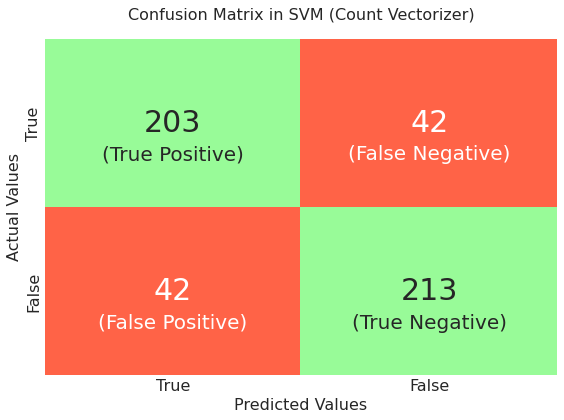

In [ ]:
from sklearn import svm

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')

#Count Vectorizer
print('Count Vectorizer:')
# train the model using X_train_count_dtm & prediction
%time classifier_linear.fit(x_train_count_dtm, y_train)
y_pred_class = classifier_linear.predict(x_test_count_dtm)

# compute accuracy of class predictions and show method metrics
report, accuracy = Metrics_Viz(y_test, y_pred_class, 82.3, 83.6, 0.07, 'Metrics in SVM (Count Vectorizer)')

# compute and show confusion matrix
cm = Confusion_Matrix_Viz('Confusion Matrix in SVM (Count Vectorizer)')

 ##### Tf_Idf:


Tf_idf:
CPU times: user 4.76 s, sys: 2.31 ms, total: 4.76 s
Wall time: 4.74 s

Metrics: 
<class 'numpy.float64'>
accuracy: 0.882
positive:  {'precision': 0.8780487804878049, 'recall': 0.8816326530612245, 'f1-score': 0.8798370672097761, 'support': 245}
negative:  {'precision': 0.8858267716535433, 'recall': 0.8823529411764706, 'f1-score': 0.8840864440078585, 'support': 255}




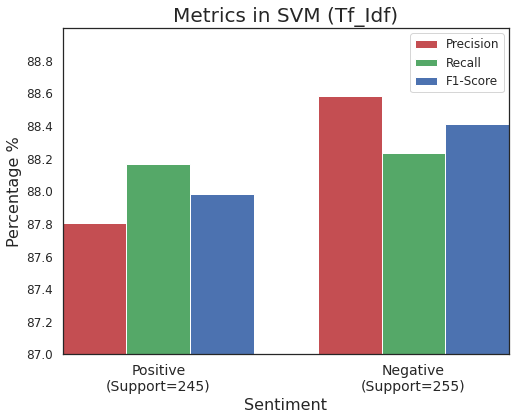


Confusion Matrix:
[[216  29]
 [ 30 225]]




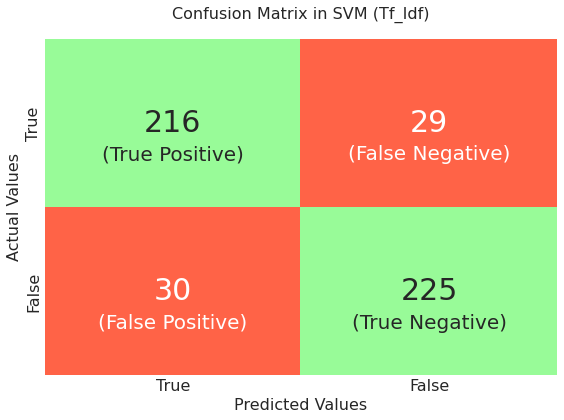

In [ ]:
# Tf_idf
print('\nTf_idf:')
# train the model using X_train_tfidf_dtm & prediction
%time classifier_linear.fit(x_train_tfidf_dtm, y_train)
y_pred_class = classifier_linear.predict(x_test_tfidf_dtm)

# compute accuracy of class predictions and show method metrics
svm_report, svm_accuracy = Metrics_Viz(y_test, y_pred_class, 87, 89, 0.2, 'Metrics in SVM (Tf_Idf)')

# compute and show confusion matrix
svm_cm = Confusion_Matrix_Viz('Confusion Matrix in SVM (Tf_Idf)')

# Model Comparison and point for further research


## Graph Analysis

We present the metrics of the tf_idf implementation for each of the methods Multinomial NB, Logistic Regression and SVM, as it offered the best results. 

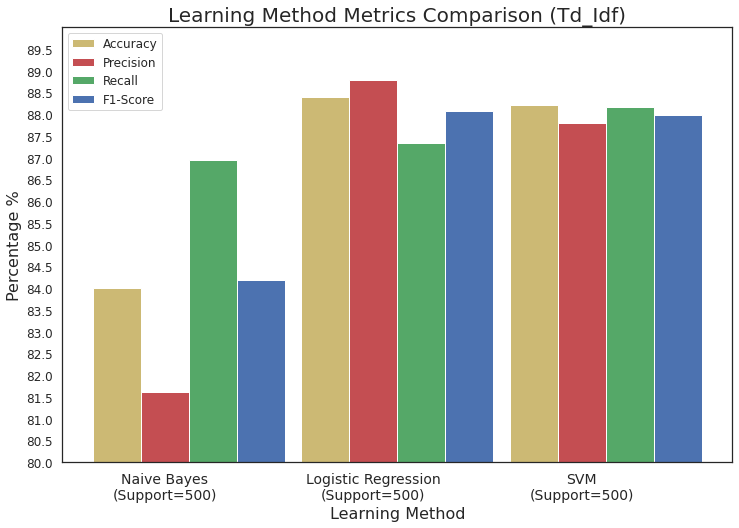

In [ ]:
#df = pd.DataFrame([nb_report['1'], nb_report['0']])
#nb_answer = dict(df.mean())
#df = pd.DataFrame([lg_report['1'], lg_report['0']])
#lg_answer = dict(df.mean())
#df = pd.DataFrame([svm_report['1'], svm_report['0']])
#svm_answer = dict(df.mean())

N = 3
ind = np.arange(N) 
width = 0.23
fig, ax = plt.subplots(figsize=(12,8))
#ax.margins(x=0, y=-0.1)

xvals = [nb_accuracy*100, lg_accuracy*100, svm_accuracy*100]
bar1 = ax.bar(ind, xvals, width, color = 'y')

yvals = [nb_report['0']['precision']*100, lg_report['0']['precision']*100, svm_report['0']['precision']*100]
bar2 = ax.bar(ind+width, yvals, width, color = 'r')
 
zvals = [nb_report['0']['recall']*100, lg_report['0']['recall']*100, svm_report['0']['recall']*100]
bar3 = ax.bar(ind+width*2, zvals, width, color='g')
  
wvals = [nb_report['0']['f1-score']*100, lg_report['0']['f1-score']*100, svm_report['0']['f1-score']*100]
bar4 = ax.bar(ind+width*3, wvals, width, color = 'b') 

plt.xlabel("Learning Method", size=16)
plt.ylabel('Percentage %', size=16)
plt.title("Learning Method Metrics Comparison (Td_Idf)", size=20)
  
plt.ylim(80, 90)
plt.yticks(np.arange(80, 90, 0.5), size=12)
plt.xticks(ind+width,["Naive Bayes\n(Support={})".format(nb_report['0']['support'] + nb_report['1']['support']), "Logistic Regression\n(Support={})".format(lg_report['0']['support'] + lg_report['1']['support']), "SVM\n(Support={})".format(svm_report['0']['support'] + svm_report['1']['support'])], size=14)
plt.legend( (bar1, bar2, bar3, bar4), ('Accuracy', 'Precision', 'Recall', 'F1-Score'))
plt.setp(plt.gca().get_legend().get_texts(), fontsize='12')
plt.show()

# Deep Learning Models
For this part I used a previous work wich was made by me(thibaut) and a friend for a projet on IMBD sentiement classification.


Here are some of the additionnal references we used to implement it : 
* [deep example](https://medium.com/analytics-vidhya/sentiment-analysis-for-text-with-deep-learning-2f0a0c6472b5)
* [code example](https://slundberg.github.io/shap/notebooks/deep_explainer/Keras%20LSTM%20for%20IMDB%20Sentiment%20Classification.html)

* Something I also wanted to try: [state of the art bert transfoormers](https://towardsdatascience.com/sentiment-analysis-in-10-minutes-with-bert-and-hugging-face-294e8a04b671)

## LTSMs networks

> This experiment is about Recurrent neural networks, in particular LTSMs and word embedding.
* LTSMs ➡ [wikipedia explanation](https://en.wikipedia.org/wiki/Long_short-term_memory)
* Word embeddind ➡ [wikipedia explanation](https://fr.wikipedia.org/wiki/Word_embedding)

We will use them to build text classifiers using deep learning.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int because model can't learn from text
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture

from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model

<hr>
<i>Function for getting the maximum review length, by calculating the mean of all the reviews length (using <b>numpy.mean</b>)</i>

In [ ]:
def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

<hr>

### Tokenize and Pad/Truncate Reviews
A Neural Network only accepts numeric data, so we need to encode the reviews. I use <b>tensorflow.keras.preprocessing.text.Tokenizer</b> to encode the reviews into integers, where each unique word is automatically indexed (using <b>fit_on_texts</b> method) based on <b>x_train</b>. <br>
<b>x_train</b> and <b>x_test</b> is converted into integers using <b>texts_to_sequences</b> method.

Each reviews has a different length, so we need to add padding (by adding 0) or truncating the words to the same length (in this case, it is the mean of all reviews length) using <b>tensorflow.keras.preprocessing.sequence.pad_sequences</b>.


* <b>post</b>, pad or truncate the words in the back of a sentence<br>
* <b>pre</b>, pad or truncate the words in front of a sentence

In [ ]:
# ENCODE REVIEW
token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_test, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[  151 22076  1502 ...     0     0     0]
 [   16  1038   234 ...  1410   216   638]
 [  351  2040   694 ...   968   567   301]
 ...
 [ 3337   524   486 ...  3809  3712   304]
 [  945  1049  1182 ...     0     0     0]
 [ 2914   905   924 ...     0     0     0]] 

Encoded X Test
 [[  521   720  7896 ...  1249    22  1249]
 [   96   775  1129 ...    26   461  4790]
 [  137  5140    16 ...     0     0     0]
 ...
 [ 1077  1303 19579 ...   313   386  8777]
 [  224   684  1225 ...   726  4869     1]
 [ 4641   795   145 ...     0     0     0]] 

Maximum review length:  353


<hr>

### Build Architecture/Model
<b>Embedding Layer</b>: in simple terms, it creates word vectors of each word in the <i>word_index</i> and group words that are related or have similar meaning by analyzing other words around them.

<b>LSTM Layer</b>: to make a decision to keep or throw away data by considering the current input, previous output, and previous memory. There are some important components in LSTM.
<ul>
    <li><b>Forget Gate</b>, decides information is to be kept or thrown away</li>
    <li><b>Input Gate</b>, updates cell state by passing previous output and current input into sigmoid activation function</li>
    <li><b>Cell State</b>, calculate new cell state, it is multiplied by forget vector (drop value if multiplied by a near 0), add it with the output from input gate to update the cell state value.</li>
    <li><b>Ouput Gate</b>, decides the next hidden state and used for predictions</li>
</ul>

<b>Dense Layer</b>: compute the input with the weight matrix and bias (optional), and using an activation function. We use <b>Sigmoid</b> activation function for this work because the output is only 0 or 1.

The optimizer is <b>Adam</b> and the loss function is <b>Binary Crossentropy</b> because again the output is only 0 and 1, which is a binary number.

We tried different values for the two dropout layers because the loss function of the validation split was <b>strange</b>. It seems that having a very high dropout value is reducing the randomness of the loss value.

In [ ]:
from keras.layers import Dropout

# ARCHITECTURE
EMBED_DIM = 32
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(LSTM(LSTM_OUT, dropout=0.3))
model.add(Dense(1, activation='relu'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 353, 32)           1106432   
                                                                 
 lstm_2 (LSTM)               (None, 64)                24832     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,131,329
Trainable params: 1,131,329
Non-trainable params: 0
_________________________________________________________________
None


<hr>

### Training
For training, it is simple. We only need to fit our <b>x_train</b> (input) and <b>y_train</b> (output/label) data. For this training, We use a mini-batch learning method with a <b>batch_size</b> of <i>100</i> and <i>4</i> <b>epochs</b>.

Also, We added a callback called **checkpoint** to save the model locally for every epoch if its accuracy improved from the previous epoch.

In [ ]:
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/SML/models/LSTMtest.h5',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)

With the validation parameter, the model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.
We use this parameter to avoid overfitting. Indeed we would not want to resample our validation set after each epoch.

In [ ]:
history = model.fit(x_train, y_train, batch_size = 100, epochs = 40, callbacks=[checkpoint], validation_split=0.3)

<hr>

### Testing
To evaluate the model, we need to predict the sentiment using our <b>x_test</b> data and comparing the predictions with <b>y_test</b> (expected output) data. Then, we calculate the accuracy of the model by dividing numbers of correct prediction with the total data. Resulted an accuracy around <b>75%</b>

In [ ]:
#y_pred = model.predict_classes(x_test, batch_size = 128)
y_pred = (model.predict(x_test) > 0.5).astype("int32")
true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))

16/16 [==============================] - 1s 7ms/step
Correct Prediction: 258
Wrong Prediction: 242
Accuracy: 51.6


---

### Load Saved Model

Load saved model and use it to predict a movie review statement's sentiment (positive or negative).

In [ ]:
loaded_model = load_model('/content/drive/MyDrive/SML/models/LSTM.h5')

Receives a review as an input to be predicted.
For testing you can pick any english review comming from well known film review website:
> [Rotten Tomatoes](https://www.rottentomatoes.com/)

In [ ]:
review = str(input('Movie Review: '))

Movie Review: bad movie


The input must be pre processed before it is passed to the model to be predicted because this review is not looking like the data our model is able to eat.

In [ ]:
# Pre-process input
regex = re.compile(r'[^a-zA-Z\s]')
review = regex.sub('', review)
print('Cleaned: ', review)

words = review.split(' ')
filtered = [w for w in words if w not in english_stops]
filtered = ' '.join(filtered)
filtered = [filtered.lower()]

print('Filtered: ', filtered)

Cleaned:  bad movie
Filtered:  ['bad movie']


Once again, we need to tokenize and encode the words. We use the tokenizer which was previously declared because we want to encode the words based on words that are known by the model.

In [ ]:
tokenize_words = token.texts_to_sequences(filtered)
tokenize_words = pad_sequences(tokenize_words, maxlen=max_length, padding='post', truncating='post')
print(tokenize_words)

This is the result of the prediction which shows the **confidence score** of the review statement.

In [ ]:
result = loaded_model.predict(tokenize_words)
print(result)

1/1 [==============================] - 0s 362ms/step
[[0.44600573]]


If the confidence score is close to 0, then the statement is **negative**. On the other hand, if the confidence score is close to 1, then the statement is **positive**. I use a threshold of **0.7** to determine which confidence score is positive and negative, so if it is equal or greater than 0.7, it is **positive** and if it is less than 0.7, it is **negative**

In [ ]:
if result >= 0.5:
    print('positive')
else:
    print('negative')

negative


### loss / accuracy

It could be a good idea to see how different <b>model metrics</b> had evolve during the model <b>training phase</b>. In order to analyse them we have to explore the <b>history</b> of our model and plot different values over the <b>epoch</b>.

Here we choose to plot :
1. the **Accuracy** on the **train** data
2. the **Accuracy** on the **validation** data
3. the **Loss** on the **train** data
4. the **Loss** on the **validation** data

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


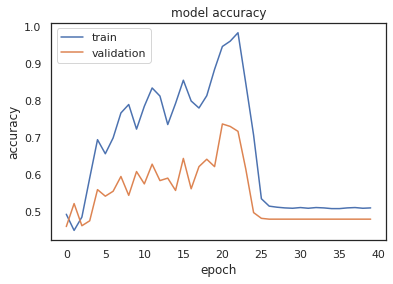

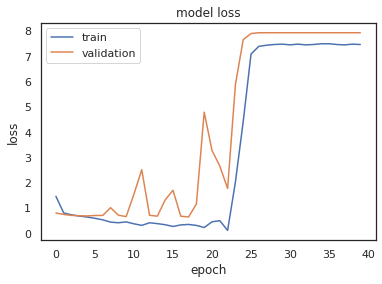

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


As we can see, the loss and accuracy plot have unpredictable behaviour. My idea would be that we would need more data so he would not overfit the training data this quickly.

There is always a notable difference between the train set and the validation set.

We have tried as much as possible to modify the parameters of our model so that it is as accurate as possible.

Varying :
1. The bach size 
2. The number of epochs
3. the different layers of the model (droupout / activation functions)


# Brief Conclusion & additionnals sources

---
So we were able to see how from data such as film reviews we were able to build different models that are able to recognize the feeling associated with a text.

Some models have better results than others and some have trouble to keep the same learning behaviour (deep ones). And we tryed to understand why we observed those results based on the models architectures.

Thoses same models are even implementable in an application so the logic would be the prediction of good/bad feeling probability from a given text.

##Additionnals sources :

[Amelioration of Baysian](https://www.baeldung.com/cs/naive-bayes-classification-performance)

[Pre-process Graphs](https://www.enjoyalgorithms.com/blog/sentiment-analysis-using-machine-learning)


[Confusion Matrix Visualization](https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
https://stackoverflow.com/questions/70097754/confusion-matrix-with-different-colors)

[Metrics Visualization](
https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/)

[Scattertext word sentiment plot](
https://www.researchgate.net/figure/Sentiment-Profile-of-a-negatively-rated-movie-The-actual-and-observed-document-level_fig2_261429368)